In [13]:
import numpy as np
import theano
import keras
from matplotlib import pyplot as plt
%matplotlib inline

print("Numpy version: {}".format(np.__version__))
print("Theano version: {}".format(theano.__version__))
print("Keras version: {}".format(keras.__version__))

Numpy version: 1.13.3
Theano version: 0.9.0.dev-425cb8effc7958e8ca376b023d8344b7620a9622
Keras version: 2.1.2


In [33]:
# Load important packages and MNIST dataset from keras

# The model : Sequential, perfect for this type of feed-forward CNN
from keras.models import Sequential

# The "core" layers
from keras.layers import Dense, Dropout, Activation, Flatten

# The CNN layers 
from keras.layers import Conv2D, MaxPooling2D

# Utilities
from keras.utils import np_utils

# MNIST dataset is included in Keras Library
from keras.datasets import mnist

In [25]:
# The data is pre-shuffled
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data Viz

In [26]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Training set is composed of 60000 images, of size 28x28 pixels. Test set is composed of 10000 images of similar size.

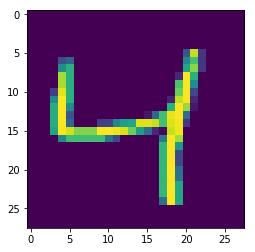

In [27]:
# Visualize one image of the set, that corresponds to a 4
plt.imshow(X_train[2])

# Data Preprocessing

In [28]:
# Preprocess train and test input sets

# With Theano, one has to declare the depth of the image
# For ex., 3 in RGB images, 1 here
# We should reshape from (n, width, height) to (n, depth, width, height)
n_train = X_train.shape[0]
n_test = X_test.shape[0]
depth = 1
height = X_train.shape[1] 
width = X_train.shape[1]

X_train = X_train.reshape(n_train, depth, width, height)
X_test = X_test.reshape(n_test, depth, width, height)

print(X_train.shape)

# Convert and normalize data type to float32
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

(60000, 1, 28, 28)


In [29]:
# Preprocess class labels

# It should be in the form of a matrix with 10 columns (10 digits)
# With a 1 in the true label

Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)

print(Y_train.shape)

(60000, 10)


# Model Architecture

In [36]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1,28,28)))
model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling is a way to reduce # of parameters
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropout is to regularize
model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(10, activation='softmax'))

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, )